<a href="https://colab.research.google.com/github/nrzsdy1993/Deeplearning_Basic/blob/main/%EC%8B%9C%ED%97%98_%EC%8B%A4%EA%B8%B01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 데이터(45)
---


### 1-1 **외부 테이터셋 (15)**
---

#### **대회 데이터 가져오기 (5)**

  * https://dacon.io/competitions/open/235539/data 에서 데이터를 다운받고 코랩에 업로드 합니다.
  * train.csv 만 사용하세요, pandas를 이용해 load합니다.

In [ ]:
! ls

model.png  sample_data	submission.csv	test.csv  train.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### **numpy로 변환하기 (5)**
  * 위에서 로드한 데이터를 넘파이로 변환합니다.
  * shape를 확인합니다

In [ ]:
data_np = data.to_numpy()
print(data_np)
print("")
data_np.shape

[[1 0 3 ... 7.25 nan 'S']
 [2 1 1 ... 71.2833 'C85' 'C']
 [3 1 3 ... 7.925 nan 'S']
 ...
 [889 0 3 ... 23.45 nan 'S']
 [890 1 1 ... 30.0 'C148' 'C']
 [891 0 3 ... 7.75 nan 'Q']]



(891, 12)

#### **데이터 정의하기** (5)
  * x와 y 값을 정의합니다.
  * x_train, x_test, y_train, y_test를 정의합니다.

In [ ]:
x_data= data_np[:,15:].astype('float')
y_data= data_np[:,1]
print(x_data.shape, y_data.shape)

(891, 0) (891,)


### 1-2 **케라스 데이터 (30)**
---

#### **케라스 데이터 가져오기 (5)**
  * tensorflow.keras 의 datasets 에서 cifar10 데이터를 가져옵니다
  * 각 데이터의 shape를 확인하고 각 차원의 의미를 적으세요

In [ ]:
from tensorflow.keras import datasets
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import applications
from tensorflow.keras import layers, Model

In [ ]:
cifar10_mnist = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10_mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

#### **데이터 시각화 (15)**
  * 아래 세 이미지와 최대한 비슷하게 그리세요
    * 이미지 시각화 (5)
    * x 히스토그램 - test set만 그리세요 (5)
    * y 히스토그램 - test set만 그리세요 (5)
  
  ![](https://github.com/yebiny/Lecture_deeplearning_basic/blob/main/imgs/test_vis.png?raw=true)



/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


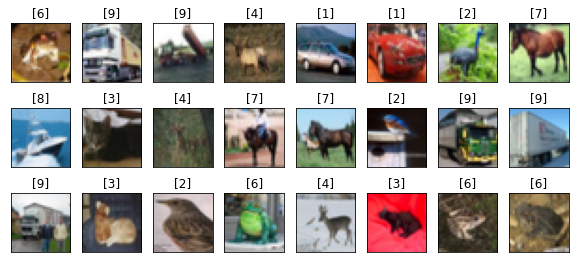

In [ ]:
plt.figure(figsize=(10,6)) 
for i in range(24):
  plt.subplot(4,8,i+1)
  img=x_train[i]
  label = y_train[i]
  plt.imshow(img, cmap ='gray')
  plt.title(label)
  plt.xticks([])
  plt.yticks([])
plt.show()

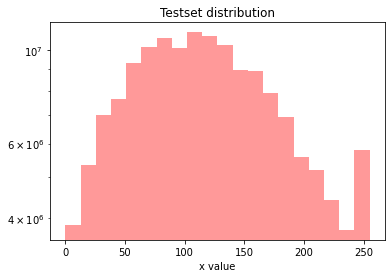

In [ ]:
plt.title("Testset distribution")
plt.xlabel("x value")

plt.hist(np.reshape(x_train, (50000*32*32*3)),log=True,  color='red', bins=20, alpha=0.4)

plt.show()

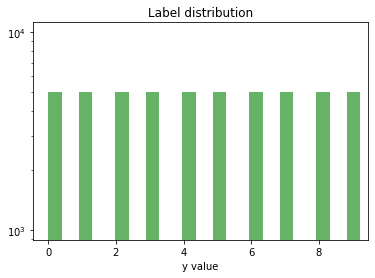

In [ ]:
plt.title("Label distribution")
plt.xlabel("y value")

plt.hist(np.reshape(y_train, (50000*1)),log=True, color='green', bins=50, width =0.4, alpha=0.6)
plt.show()

#### **데이터 전처리 (10)**
  * x_train, x_test 전처리: 정규화 (5)
  * y_train, y_test 전처리: 원핫벡터 (5)

In [ ]:
def minmax(x):
  x_min= np.min(x)
  x_max= np.max(x)
  return (x-x_min) / (x_max-x_min)
  
x_train_minmax = minmax(x_train)
x_test_minmax = minmax(x_test)
x_train_minmax.shape, x_test_minmax.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
def z_score(x):
  x_mean= np.mean(x)
  x_std= np.std(x)
  return (x-x_mean) / x_std

x_train_z_score = z_score(x_train)
x_test_z_score = z_score(x_test)
x_train_z_score.shape, x_test_z_score.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)
print(y_train_onehot.shape)
print(y_test_onehot.shape)

(50000, 10)
(10000, 10)


## 2. 모델 (55)
---



### **2-1. 모델 구현과 시각화 (20)**
---


#### **softmax regression(5)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import models, layers, optimizers
from sklearn import tree

sr = models.Sequential(name='Softmax_regression')
sr.add(layers.Flatten(input_shape = [32,32,3]))
sr.add(layers.Dense(10, activation='softmax'))
sr.summary()

Model: "Softmax_regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_65 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_163 (Dense)            (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


#### **dnn (5)** : 아래 그림의 모델을 구현합니다.

![](https://github.com/yebiny/Lecture_deeplearning_basic/blob/main/imgs/test_dnn.png?raw=true)

In [ ]:
dnn = models.Sequential(name='DNN')
# input layer
dnn.add(layers.Flatten(input_shape = [32,32,3]))
# hidden layer
dnn.add(layers.Dense(32, activation='relu'))
dnn.add(layers.Dense(128, activation='relu'))
dnn.add(layers.Dense(128, activation='relu'))
dnn.add(layers.Dense(32, activation='relu'))
# output layer  (고정)
dnn.add(layers.Dense(10, activation='softmax'))
dnn.summary()

Model: "DNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_66 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_164 (Dense)            (None, 32)                98336     
_________________________________________________________________
dense_165 (Dense)            (None, 128)               4224      
_________________________________________________________________
dense_166 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_167 (Dense)            (None, 32)                4128      
_________________________________________________________________
dense_168 (Dense)            (None, 10)                330       
Total params: 123,530
Trainable params: 123,530
Non-trainable params: 0
_________________________________________________________

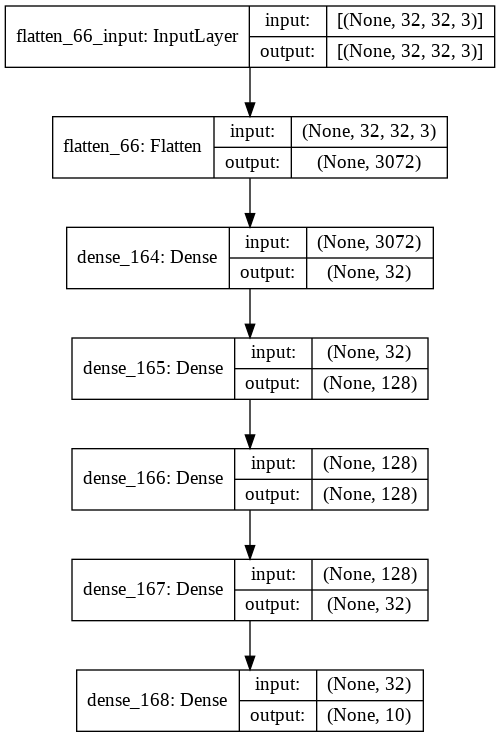

In [ ]:
from tensorflow.keras import utils

utils.plot_model(dnn, show_shapes=True)

#### **cnn1 (5)** : 아래 그림의 모델을 구현합니다.

![](https://github.com/yebiny/Lecture_deeplearning_basic/blob/main/imgs/test_cnn1.png?raw=true)

In [ ]:
cnn1 = models.Sequential(name='CNN1')


# input layer
cnn1.add(layers.Reshape([32,32,3], input_shape = [32,32,3]))
# hidden layer
cnn1.add(layers.Conv2D(3, kernel_size = 17, activation='relu')) 
cnn1.add(layers.MaxPool2D(pool_size=1))

cnn1.add(layers.Conv2D(3, kernel_size = 9, activation='relu'))  
cnn1.add(layers.Flatten())

cnn1.add(layers.Dense(32, activation='softmax'))
cnn1.add(layers.Dense(32, activation='softmax'))
cnn1.add(layers.Dense(10, activation='softmax'))
cnn1.summary()

Model: "CNN1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_90 (Reshape)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_305 (Conv2D)          (None, 16, 16, 3)         2604      
_________________________________________________________________
max_pooling2d_227 (MaxPoolin (None, 16, 16, 3)         0         
_________________________________________________________________
conv2d_306 (Conv2D)          (None, 8, 8, 3)           732       
_________________________________________________________________
flatten_67 (Flatten)         (None, 192)               0         
_________________________________________________________________
dense_169 (Dense)            (None, 32)                6176      
_________________________________________________________________
dense_170 (Dense)            (None, 32)                1056   

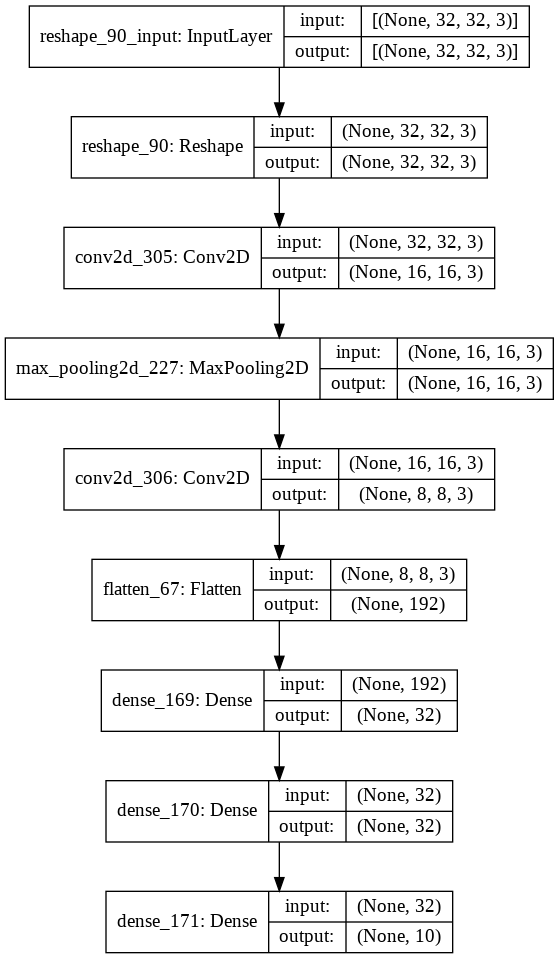

In [ ]:
from tensorflow.keras import utils

utils.plot_model(cnn1, show_shapes=True)

#### **cnn2 (5)** : 아래 그림의 모델을 구현합니다.
![](https://github.com/yebiny/Lecture_deeplearning_basic/blob/main/imgs/test_cnn2.png?raw=true)

In [ ]:
cnn2 = models.Sequential(name='CNN2')

# input layer
cnn2.add(layers.Reshape([32,32,3], input_shape = [32,32,3]))
# hidden layer
cnn2.add(layers.Conv2D(3, kernel_size = 25, activation='relu')) 
cnn2.add(layers.MaxPool2D(pool_size=1))

cnn2.add(layers.Conv2D(3, kernel_size = 5, activation='relu'))  
cnn2.add(layers.Flatten())

a=cnn2.add(layers.Dense(64, activation='softmax'))
b=cnn2.add(layers.Dense(64, activation='softmax'))
# add(layers.Dense(32, activation='softmax'))
# b.add(layers.Dense(32, activation='softmax'))


# cnn2.add(layers.Dense(10, activation='softmax'))

cnn2.summary()

Model: "CNN2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_91 (Reshape)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_307 (Conv2D)          (None, 8, 8, 3)           5628      
_________________________________________________________________
max_pooling2d_228 (MaxPoolin (None, 8, 8, 3)           0         
_________________________________________________________________
conv2d_308 (Conv2D)          (None, 4, 4, 3)           228       
_________________________________________________________________
flatten_68 (Flatten)         (None, 48)                0         
_________________________________________________________________
dense_172 (Dense)            (None, 64)                3136      
_________________________________________________________________
dense_173 (Dense)            (None, 64)                4160   

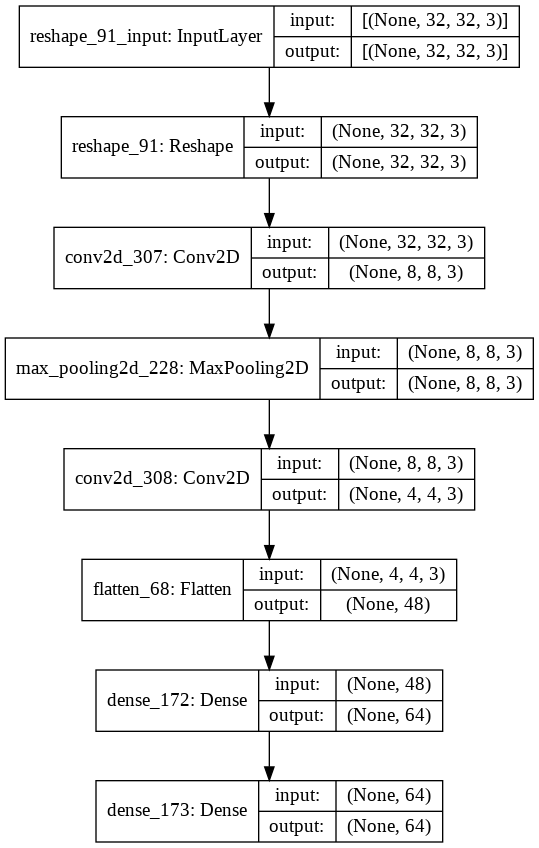

In [ ]:
utils.plot_model(cnn2, show_shapes=True)

### **2-2. 모델 가져오기 (10)**
---


#### **모델 로드 후 시각화 (5)**

In [ ]:
base_model = applications.vgg16.VGG16(weights='imagenet', 
                                      include_top=False, # 마지막 레이어
                                      input_shape=[32,32,3])
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_66 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

#### **가져온 모델 데이터에 맞게 수정후 시각화 (5)**

In [ ]:
x = base_model.output
y = layers.Flatten(name='Add_flatten')(x)
#y = layers.Dense(128, activation='relu')(y)
y = layers.Dense(10, activation='softmax', name='Add_dense')(y)
model = models.Model(inputs=base_model.input, outputs = y)
model.summary()

for i in range(19):
  print(i, model.layers[i])
  model.layers[i].trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['acc'])

Model: "model_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_66 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0  

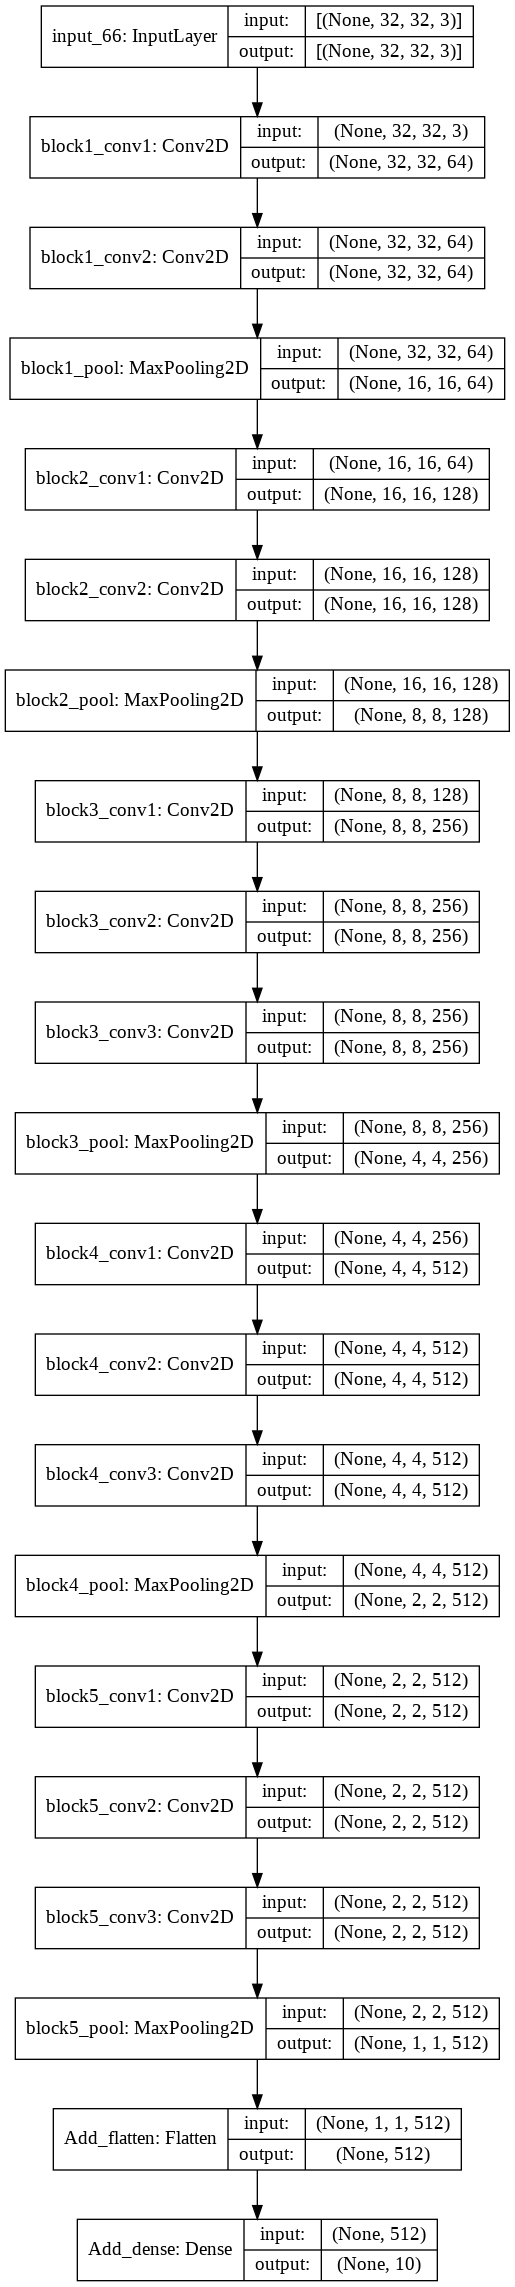

In [ ]:
utils.plot_model(model, show_shapes=True)

### **2-3. 모델 학습 (15)**
---

* 데이터셋 
  * 위에서 정의한 두개의 데이터셋 중 하나를 이용합니다.
  * 성능 향상을 위하여 위 데이터셋을 변형해도 좋습니다.
* 모델
  * 문제3, 문제4 에서 만든 모델 중에서 선택하거나,
  * 새로 만들어도 좋습니다.
* 점수기준
  * 모델을 컴파일하고, 학습을 시키면 기본점수가 부과됩니다.
  * 성능평가 하여 acc 기준에 따라 점수가 부과됩니다.

#### **모델 컴파일 (5)**

In [ ]:
cnn1.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss= 'categorical_crossentropy',
           metrics=['acc'])

In [ ]:
x_train_minmax.shape, y_train_onehot.shape

((50000, 32, 32, 3), (50000, 10))

#### **모델 학습 (5)**

In [ ]:
history_cnn1 = sr.fit(x_train_minmax, y_train_onehot, epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7151 - acc: 0.4074
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7104 - acc: 0.4116
Epoch 3/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7090 - acc: 0.4122
Epoch 4/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7109 - acc: 0.4111
Epoch 5/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7091 - acc: 0.4104
Epoch 6/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7077 - acc: 0.4104
Epoch 7/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7034 - acc: 0.4121
Epoch 8/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7045 - acc: 0.4124
Epoch 9/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7023 - acc: 0.4133
Epoch 10/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6994 - acc: 0.4156
Epoch 11/20
1563/1563 [======

#### **성능평가 (5)**
  * test 셋의 accuracy 기준으로 가산점 부여(acc 70이상이면 5점)

In [ ]:
cnn1.evaluate(x_test_minmax, y_test_onehot)

313/313 [==============================] - 3s 10ms/step - loss: 2.3030 - acc: 0.1000


[2.302963972091675, 0.10000000149011612]

### **2-4. 결과 시각화 및 분석 (10)**
---
* history 이용한 loss와 accuracy 플롯 (5)
* 가산점 (5)
  * loss, accuracy 플롯을 가시성 있게 그렸을 때
  * confusion matrix , roc curve 등 추가 하였을 때

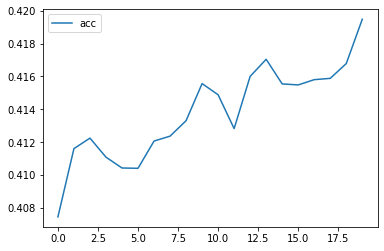

In [ ]:
plt.plot(history_cnn1.history['acc'])
plt.legend(['acc'])
plt.show()

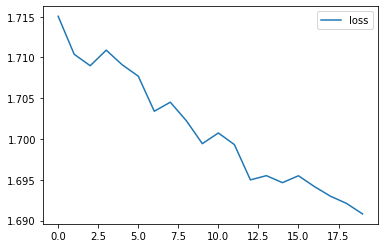

In [ ]:
plt.plot(history_cnn1.history['loss'])
plt.legend(['loss'])
plt.show()